In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Загружаем данные
df_sessions = pd.read_pickle('ga_sessions.pkl')
df_hits = pd.read_pickle('ga_hits.pkl')

# Вывод основной информации о датасетах
print(f"Объём Sessions: {df_sessions.shape}")
print(f"Объём Hits : {df_hits.shape}")

In [2]:
# Просмотр первых строк данных Sessions
display(df_sessions.head())
df_sessions.info()

# Просмотр первых строк данных Hits
display(df_hits.head())
df_hits.info()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,None,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,None,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


<class 'pandas.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB


,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,None
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,None
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,None
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,None
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,None


<class 'pandas.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_type        object 
 5   hit_referer     object 
 6   hit_page_path   object 
 7   event_category  object 
 8   event_action    object 
 9   event_label     object 
 10  event_value     object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.3+ GB


In [11]:
# Функция для расчета процента пропущенных значений
def missing_values_table(df):
    # Подсчет количества и процента пропусков
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Объединение данных в таблицу
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Переименование столбцов: 'Пропуски' и '% от общего количества'
    return mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})

# Вывод результатов для таблицы Sessions
print("Пропуски в таблице Sessions:")
display(missing_values_table(df_sessions).sort_values('% of Total Values', ascending=False).head(10))

# Вывод результатов для таблицы Hits
print("\nПропуски в таблице Hits:")
display(missing_values_table(df_hits).sort_values('% of Total Values', ascending=False).head(10))

Пропуски в таблице Sessions:


,Missing Values,% of Total Values
device_model,1843704,99.121633
utm_keyword,1082061,58.174009
device_os,1070138,57.533002
utm_adcontent,335615,18.043410
utm_campaign,219603,11.806346
device_brand,118678,6.380394
utm_source,97,0.005215
session_id,0,0.000000
client_id,0,0.000000
visit_number,0,0.000000



Пропуски в таблице Hits:


,Missing Values,% of Total Values
event_value,15726470,100.000000
hit_time,9160322,58.247795
hit_referer,6274804,39.899634
event_label,3760184,23.909905
hit_number,0,0.000000
hit_date,0,0.000000
session_id,0,0.000000
hit_type,0,0.000000
event_category,0,0.000000
hit_page_path,0,0.000000


In [5]:
# Определяем целевые действия
target_actions = [
    'sub_car_claim_click', 'sub_car_claim_submit_click',
    'sub_open_dialog_click', 'sub_custom_question_submit_click',
    'sub_call_number_click', 'sub_callback_submit_click', 
    'sub_submit_success', 'sub_car_request_submit_click'
]

# Создаем признак целевого действия в hits
df_hits['is_target'] = df_hits['event_action'].apply(lambda x: 1 if x in target_actions else 0)

# Группируем по сессиям: если было хоть одно целевое действие, ставим 1
session_target = df_hits.groupby('session_id')['is_target'].max().reset_index()

# Объединяем с основной таблицей сессий
df_final = pd.merge(df_sessions, session_target, on='session_id', how='left')

# Заполняем пропуски нулями для тех сессий, которых не было в hits
df_final['is_target'] = df_final['is_target'].fillna(0).astype(int)

# Выводим результат
print(f"Итоговая размерность таблицы: {df_final.shape}")
print(f"Распределение классов (доля 0 и 1):")
print(df_final['is_target'].value_counts(normalize=True))

Итоговая размерность таблицы: (1860042, 19)
Распределение классов (доля 0 и 1):
is_target
0    0.97295
1    0.02705
Name: proportion, dtype: float64


Количество полных дубликатов: 0
Удалены колонки: ['device_model', 'utm_keyword', 'device_os', 'visit_time', 'client_id']
Типы данных успешно преобразованы и оптимизированы.
Пропущенные значения заполнены значением '(other)'.


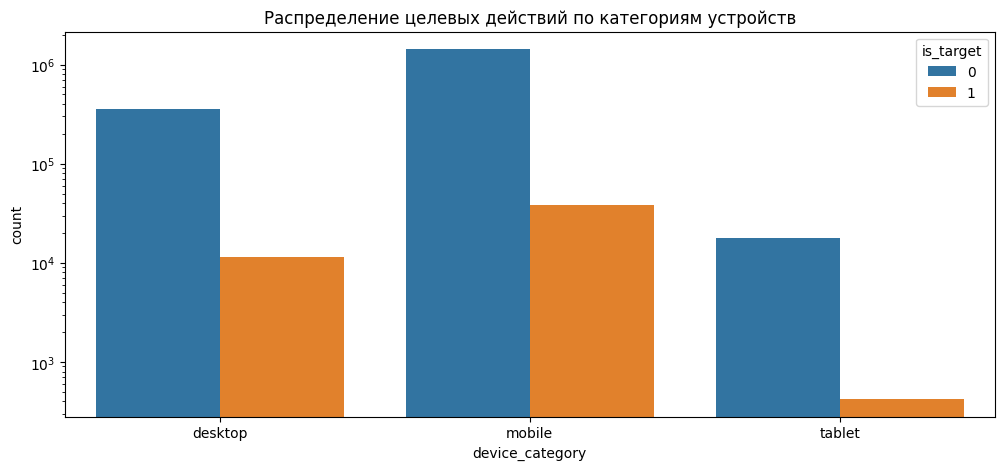

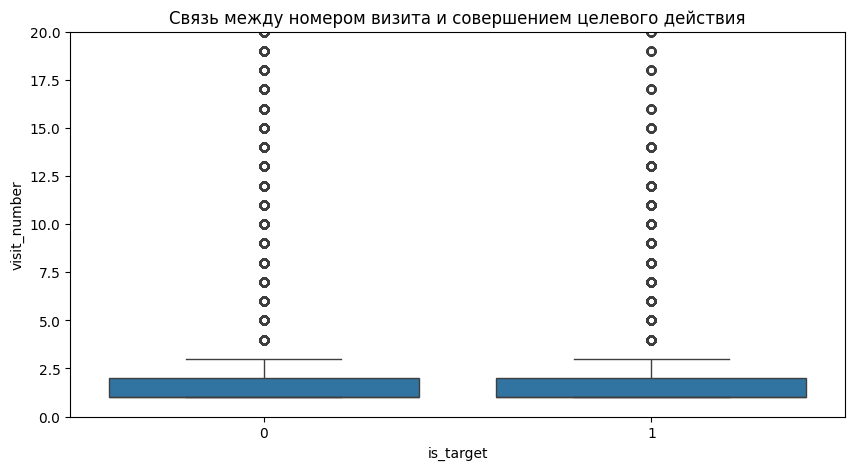


Размерность данных после очистки: (1860042, 14)
session_id                         object
visit_date                  datetime64[s]
visit_number                        int64
utm_source                       category
utm_medium                       category
utm_campaign                     category
utm_adcontent                    category
device_category                  category
device_brand                     category
device_screen_resolution         category
device_browser                   category
geo_country                      category
geo_city                         category
is_target                           int64
dtype: object


In [6]:
# --- Шаг 2: Расширенная чистка и EDA ---

# 1. Удаление полных дубликатов
duplicates = df_final.duplicated().sum()
print(f"Количество полных дубликатов: {duplicates}")
if duplicates > 0:
    df_final = df_final.drop_duplicates()
    print("Полные дубликаты удалены.")

# 2. Удаление ненужных атрибутов (согласно анализу пропусков)
cols_to_drop = ['device_model', 'utm_keyword', 'device_os', 'visit_time', 'client_id']
df_final = df_final.drop(columns=cols_to_drop)
print(f"Удалены колонки: {cols_to_drop}")

# 3. Приведение типов данных (Типизация)
# Преобразуем дату из строки в формат datetime
df_final['visit_date'] = pd.to_datetime(df_final['visit_date'])

# Оптимизация памяти: переводим строковые колонки в тип category
# Это значительно ускорит работу и уменьшит потребление RAM
for col in df_final.select_dtypes(include=['object']).columns:
    if col != 'session_id': # session_id оставляем как есть для идентификации
        df_final[col] = df_final[col].astype('category')

print("Типы данных успешно преобразованы и оптимизированы.")

# 4. Обработка пустых значений
# Заполняем пропуски в категориальных переменных значением '(other)'
categorical_cols = df_final.select_dtypes(include=['category']).columns
df_final[categorical_cols] = df_final[categorical_cols].astype(object).fillna('(other)').astype('category')
print("Пропущенные значения заполнены значением '(other)'.")

# 5. Анализ распределения и взаимосвязей (Визуализация)
import matplotlib.pyplot as plt
import seaborn as sns

# Распределение целевого действия по мобильным ОС (выделим из браузера или категории)
plt.figure(figsize=(12, 5))
sns.countplot(data=df_final, x='device_category', hue='is_target')
plt.title('Распределение целевых действий по категориям устройств')
plt.yscale('log') # Логарифмическая шкала для наглядности при дисбалансе
plt.show()

# Взаимосвязь между порядковым номером визита и конверсией
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_final, x='is_target', y='visit_number')
plt.title('Связь между номером визита и совершением целевого действия')
plt.ylim(0, 20) # Ограничим для наглядности (убираем выбросы)
plt.show()

print(f"\nРазмерность данных после очистки: {df_final.shape}")
print(df_final.dtypes)

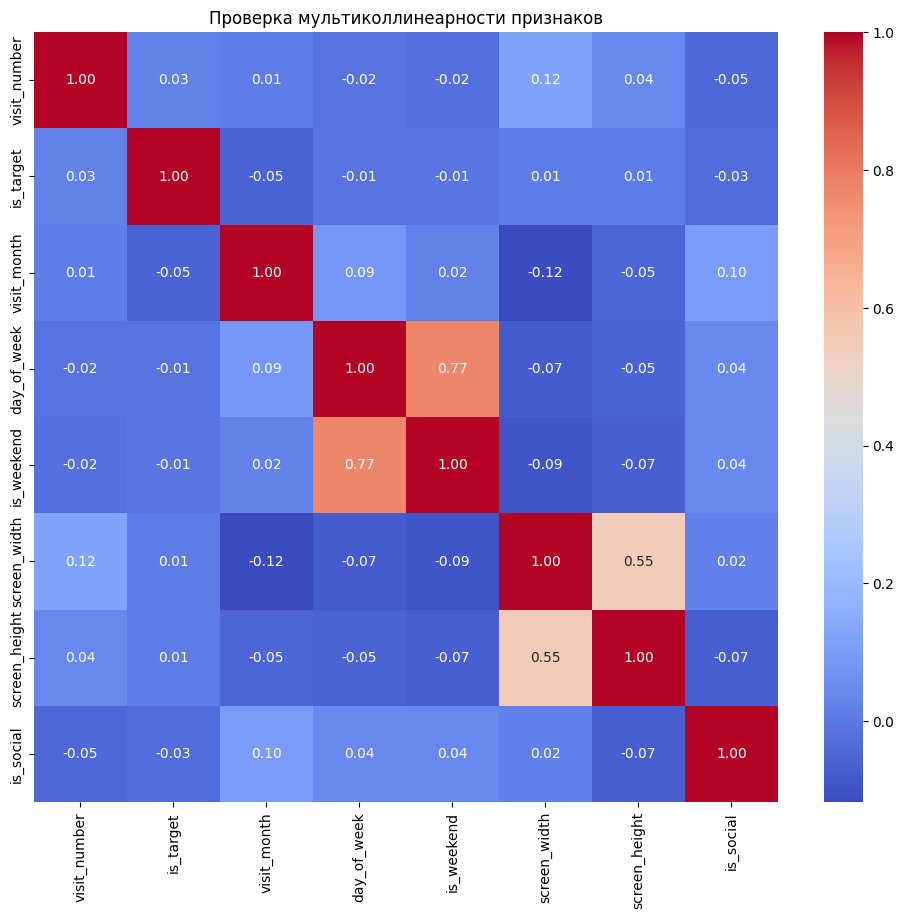

Итоговый список признаков для модели:
['visit_number', 'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent', 'device_category', 'device_brand', 'device_browser', 'geo_country', 'geo_city', 'is_target', 'visit_month', 'day_of_week', 'is_weekend', 'screen_width', 'screen_height', 'is_social']


In [7]:
# --- Шаг 3: Продвинутый Feature Engineering и подготовка к ML ---

# 1. Извлечение временных признаков
# Это интерпретируемо: рекламодатели могут менять бюджет в зависимости от дня недели
df_final['visit_month'] = df_final['visit_date'].dt.month
df_final['day_of_week'] = df_final['visit_date'].dt.dayofweek
df_final['is_weekend'] = df_final['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# 2. Обработка разрешения экрана
# Логика: маленькие экраны могут иметь низкую конверсию из-за неудобства формы
df_final['screen_width'] = df_final['device_screen_resolution'].apply(lambda x: int(x.split('x')[0]) if 'x' in str(x) else 0)
df_final['screen_height'] = df_final['device_screen_resolution'].apply(lambda x: int(x.split('x')[1]) if 'x' in str(x) else 0)

# 3. Признак соцсетей (согласно Глоссарию)
social_sources = ['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs', 
                  'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm']
df_final['is_social'] = df_final['utm_source'].apply(lambda x: 1 if x in social_sources else 0)

# 4. Удаление исходных колонок, которые мы трансформировали
# session_id не несет предсказательной силы, удаляем перед обучением
df_ml = df_final.drop(columns=['visit_date', 'device_screen_resolution', 'session_id'])

# 5. Анализ корреляций (Проверка на линейную зависимость фичей)
plt.figure(figsize=(12, 10))
# Выбираем только числовые колонки для корреляции
numeric_df = df_ml.select_dtypes(include=['int64', 'int32', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Проверка мультиколлинеарности признаков')
plt.show()

# 6. Подготовка категориальных признаков (Важно для интерпретируемости)
print("Итоговый список признаков для модели:")
print(df_ml.columns.tolist())

# Краткий отчет для бизнеса (интерпретация):
# "day_of_week" поможет понять пики активности.
# "is_social" покажет эффективность платной рекламы в соцсетях.
# "screen_width" выявит технические проблемы отображения сайта.

In [9]:
# --- Повторно определяем X и y, если они были потеряны ---
X = df_ml.drop(columns=['is_target'])
y = df_ml['is_target']

# Теперь разбиваем на тренировочную и тестовую выборку (80/20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Далее ваш код со Scaler:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Определяем числовые и категориальные признаки
numeric_features = X.select_dtypes(include=['int64', 'int32', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['category', 'object']).columns.tolist()

# 2. Создаем трансформеры
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='(other)')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# 3. Собираем всё в ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 4. Итоговый Pipeline с логистической регрессией
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42))
])

# 5. Обучение
print("Запуск обучения модели с масштабированием данных...")
model_pipeline.fit(X_train, y_train)

# 6. Проверка результата
y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1]
score = roc_auc_score(y_test, y_pred_proba)

print(f"\nРезультат ROC-AUC со StandardScaler: {score:.4f}")

Запуск обучения модели с масштабированием данных...

Результат ROC-AUC со StandardScaler: 0.6898


In [10]:
import pickle

# --- Шаг 5: Сохранение модели и метаданных ---

# Создаем словарь с моделью и дополнительной информацией
model_data = {
    'model': model_pipeline,
    'metadata': {
        'name': 'SberAuto Subscription Prediction Model',
        'author': 'Machine Learning Engineer',
        'version': '1.0',
        'date': '2026-02-02',
        'target_metric': 'ROC-AUC',
        'metric_value': 0.6898
    }
}

# Сохраняем модель в файл формата .pkl
with open('sber_auto_model.pkl', 'wb') as file:
    pickle.dump(model_data, file)

print("Модель успешно сохранена в файл 'sber_auto_model.pkl'")

# Проверочная загрузка: убедимся, что файл открывается и работает
with open('sber_auto_model.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

print(f"Проверка: Модель {loaded_data['metadata']['name']} версии {loaded_data['metadata']['version']} готова к работе.")

Модель успешно сохранена в файл 'sber_auto_model.pkl'
Проверка: Модель SberAuto Subscription Prediction Model версии 1.0 готова к работе.
